<a href="https://colab.research.google.com/github/SaraPao89/CNN/blob/main/Deeplearning_Malchiodi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

os.environ in Python is a mapping object that represents the user’s environmental variables. It returns a dictionary having user’s environmental variable as key and their values as value.</p>

In [ ]:
from google.colab import drive
import os


In [ ]:
# move working directory to google drive
use_gdrive = True # set to False if not possible to connect to drive
if use_gdrive:
  drive.mount('/content/gdrive')
  os.chdir('/content/gdrive/MyDrive/PaoliniAI')

Mounted at /content/gdrive


In [ ]:
import zipfile
import pandas as pd  
import cv2  
from matplotlib import pyplot as plt
import os 

In [ ]:

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential 

# Download Dataset (decomment if not possible to connect to drive)

In [ ]:
# os.environ['KAGGLE_USERNAME'] = "milano110"
# os.environ['KAGGLE_KEY'] = "39fdcf09aec75e25b8f44a6f9fed4ce1"

In [ ]:
# !kaggle datasets download csafrit2/plant-leaves-for-image-classification

In [ ]:
# !unzip plant-leaves-for-image-classification.zip

## Preprocessing (decomment if not possible to connect to drive)

In [ ]:
# !apt install imagemagick 

In [ ]:
# !mogrify -resize 500x Plants_2/*/*/*.JPG

#-resize 500x
#Plants_2/*/*/*.JPG 

# Train

In [ ]:
cfg_path = os.getcwd()  
input_path_train=  "Plants_2/train" 
input_path_valid= "Plants_2/valid"
input_path_test= "Plants_2/test"
input_path_imagestopredict= "input/data/images_to_predict"

train_path = os.path.join(cfg_path,input_path_train)
val_path = os.path.join(cfg_path,input_path_valid)
test_path = os.path.join(cfg_path,input_path_test)


In [ ]:
batch_size = 32 
img_width = 64
img_height = 64

train_ds = tf.keras.utils.image_dataset_from_directory(train_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size) 

val_ds = tf.keras.utils.image_dataset_from_directory(val_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=1) 

test_ds = tf.keras.utils.image_dataset_from_directory(test_path,
                                                       image_size=(img_height, img_width),
                                                       batch_size=1) 




Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


In [ ]:
class_names = train_ds.class_names

print(class_names)

['Alstonia Scholaris diseased (P2a)', 'Alstonia Scholaris healthy (P2b)', 'Arjun diseased (P1a)', 'Arjun healthy (P1b)', 'Bael diseased (P4b)', 'Basil healthy (P8)', 'Chinar diseased (P11b)', 'Chinar healthy (P11a)', 'Gauva diseased (P3b)', 'Gauva healthy (P3a)', 'Jamun diseased (P5b)', 'Jamun healthy (P5a)', 'Jatropha diseased (P6b)', 'Jatropha healthy (P6a)', 'Lemon diseased (P10b)', 'Lemon healthy (P10a)', 'Mango diseased (P0b)', 'Mango healthy (P0a)', 'Pomegranate diseased (P9b)', 'Pomegranate healthy (P9a)', 'Pongamia Pinnata diseased (P7b)', 'Pongamia Pinnata healthy (P7a)']


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) 
#train_ds = train_ds.shuffle(1000)

# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


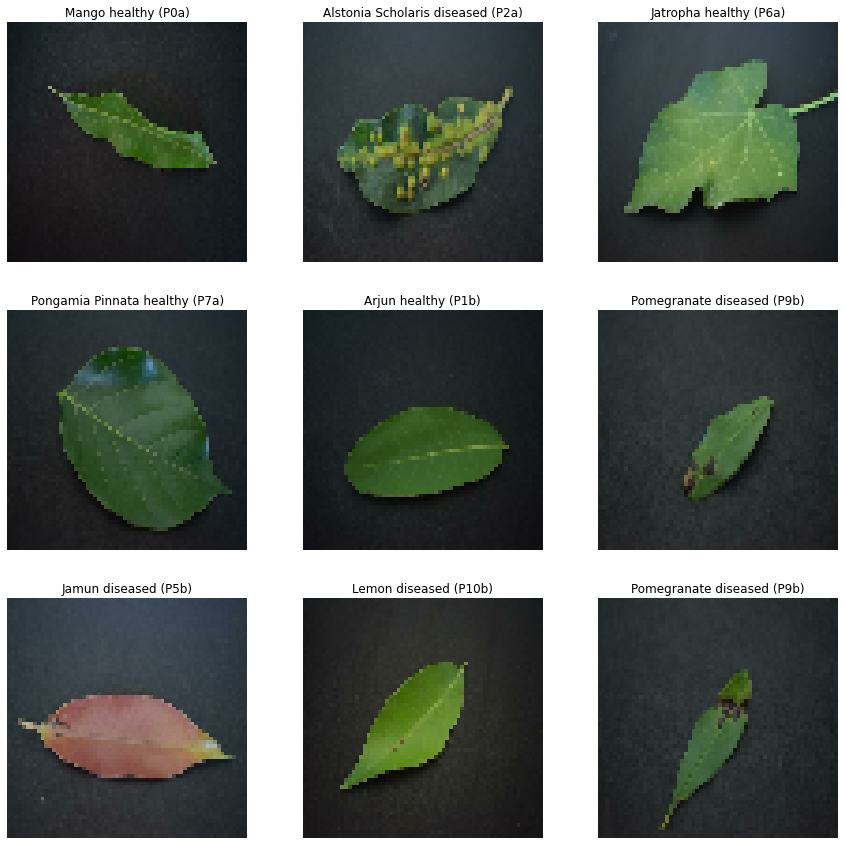

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.05,0.05),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
  ]
)

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

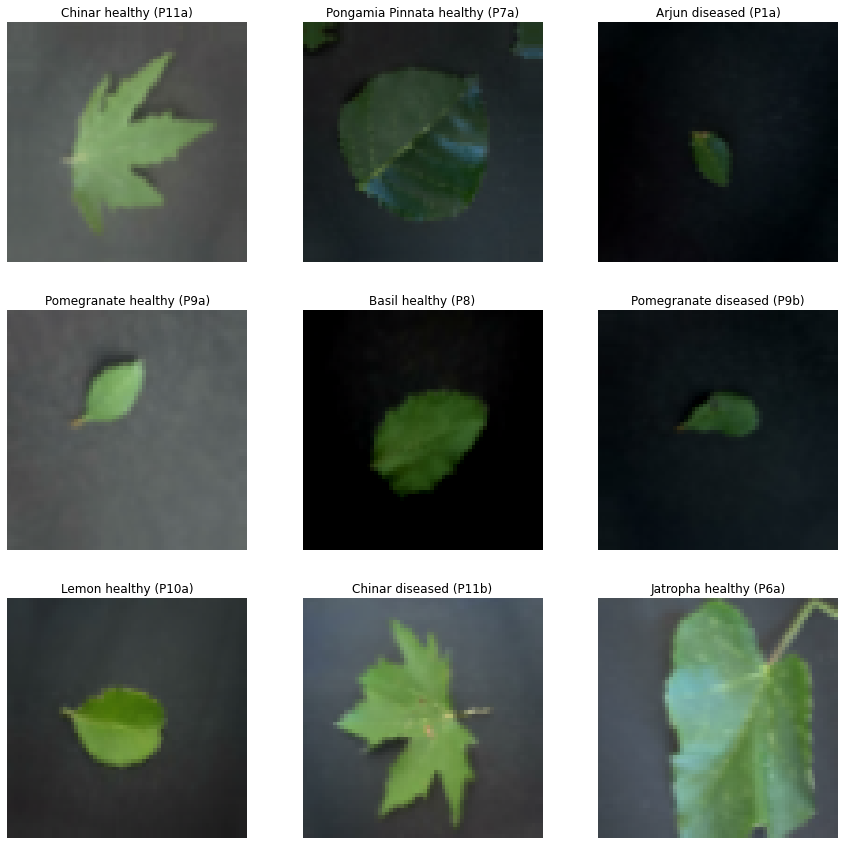

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
  images = data_augmentation(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
def build_model(parameters):
  num_classes = len(class_names)
  dropout = parameters.Float('dropout', min_value=0.0, max_value=0.4, step=0.1)
  optimizer = parameters.Choice('optimizer', values = ['adam', 'sgd'])
  model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(filters = 16, kernel_size = 7, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(dropout),
    layers.Dense(128, activation='relu'),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu'),
    layers.Dropout(dropout),
    layers.Dense(num_classes),
    layers.Softmax()
  ])
  model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
  return model

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      mode='min',
      restore_best_weights=True,
      start_from_epoch=0
  )

In [ ]:
import keras_tuner as kt

tuner = kt.RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5, 
                     directory='grid_search')

In [ ]:
tuner.search(train_ds, validation_data=val_ds, epochs=20) 

In [ ]:
best_pars=tuner.get_best_hyperparameters()[0]
for par in ['dropout', 'optimizer']:
  print(par, best_pars.get(par))

dropout 0.1
optimizer adam


In [ ]:
best_model = tuner.hypermodel.build(best_pars)

In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        2368      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                  

In [ ]:
epochs=100
history = best_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [early_stop],
  verbose = 2,
)

Epoch 1/100


134/134 - 87s - loss: 2.8457 - accuracy: 0.1289 - val_loss: 2.9775 - val_accuracy: 0.0909 - 87s/epoch - 653ms/step
Epoch 2/100
134/134 - 55s - loss: 2.3022 - accuracy: 0.2475 - val_loss: 2.8442 - val_accuracy: 0.1455 - 55s/epoch - 407ms/step
Epoch 3/100
134/134 - 55s - loss: 1.9591 - accuracy: 0.3533 - val_loss: 3.7065 - val_accuracy: 0.1545 - 55s/epoch - 408ms/step
Epoch 4/100
134/134 - 54s - loss: 1.7184 - accuracy: 0.4359 - val_loss: 4.1032 - val_accuracy: 0.1455 - 54s/epoch - 406ms/step
Epoch 5/100
134/134 - 54s - loss: 1.5489 - accuracy: 0.4902 - val_loss: 3.6316 - val_accuracy: 0.1000 - 54s/epoch - 405ms/step
Epoch 6/100
134/134 - 55s - loss: 1.3867 - accuracy: 0.5393 - val_loss: 3.9589 - val_accuracy: 0.1273 - 55s/epoch - 407ms/step
Epoch 7/100
134/134 - 55s - loss: 1.2807 - accuracy: 0.5805 - val_loss: 4.7267 - val_accuracy: 0.1455 - 55s/epoch - 410ms/step


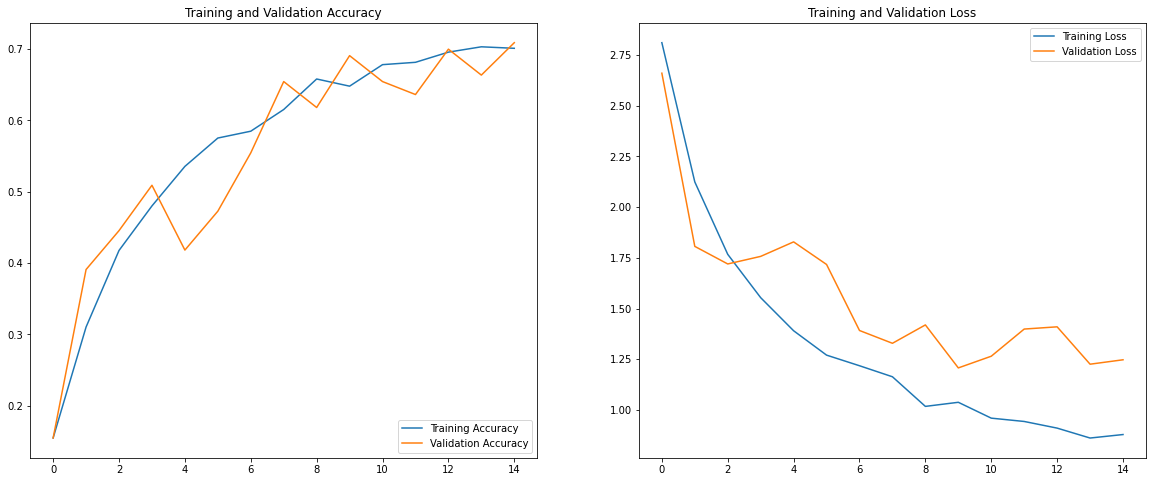

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('saved_model/my_model')

# Test

In [ ]:
model = tf.keras.models.load_model('saved_model/best_model')

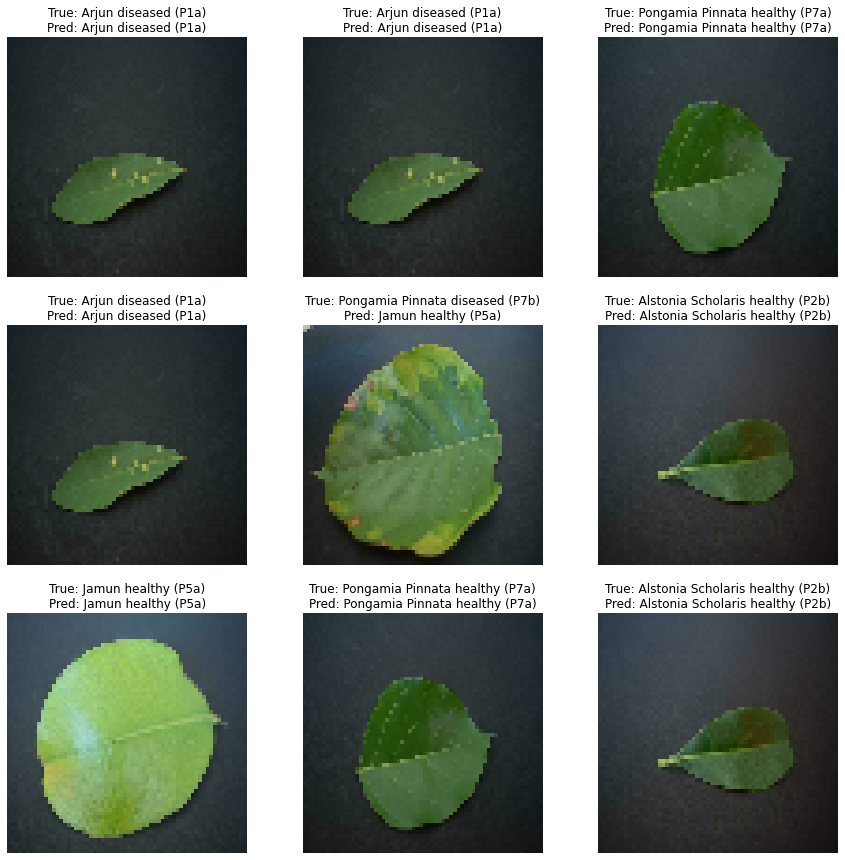

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  batch = list(test_ds.take(1))
  img, label = batch[0]
  pred = model.predict(img, verbose=False).argmax(-1)
  plt.imshow(img[0].numpy().astype(int))
  plt.title(f"True: {class_names[label[0]]}\nPred: {class_names[pred[0]]}")
  plt.axis('off')
plt.show()


In [ ]:
trues = []
preds = []
for img, label in test_ds:
  pred = model.predict(img, verbose=0)
  pred = pred.argmax(-1)
  trues.append(label[0])
  preds.append(pred[0])


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [ ]:
print('Accuracy:', accuracy_score(trues, preds))

Accuracy: 0.7454545454545455


In [ ]:
print('Precision:', precision_score(trues, preds, average='macro'))

Precision: 0.7406926406926408


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Recall:', recall_score(trues, preds, average='macro'))

Recall: 0.7454545454545454


In [ ]:
print('F1:', f1_score(trues, preds, average='macro'))

F1: 0.7164994096812278


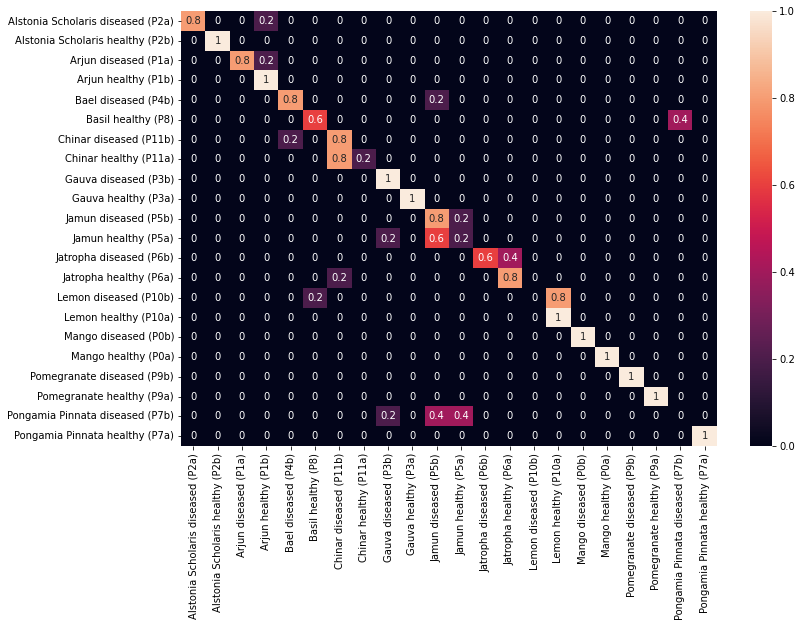

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(trues, preds, normalize='true'), annot=True, xticklabels=class_names, yticklabels=class_names)
plt.show()